In [1]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
from tensorflow import keras
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
train_data = pd.read_csv('./competitive-data-science-predict-future-sales/sales_train.csv'); # 2013년 1월부터 2015년 10월까지 
test_data  = pd.read_csv('./competitive-data-science-predict-future-sales/test.csv'); # 2015년 11월의 shop과 product의 판매량을 예측하고 싶은것
submission = pd.read_csv('./competitive-data-science-predict-future-sales/sample_submission.csv'); # 이런형식으로 제출
items      = pd.read_csv('./competitive-data-science-predict-future-sales/items.csv'); # item과 product의 보충정보들
item_categories  = pd.read_csv('./competitive-data-science-predict-future-sales/item_categories.csv');
shops      = pd.read_csv('./competitive-data-science-predict-future-sales/shops.csv');
#item_cnt_day = 팔린 제품의 수/판매된 제품 수 월별 금액. 이걸로 매달 판매량 예측할 것.
#date_block_num = 편의를 위해 연속된 월번호 / 2013년 1월은 0, 2013년 2월은 2 ~ 2015년 10월을 33
train_data

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


In [3]:
df_item=pd.merge(items,item_categories,on='item_category_id',how='inner')
sales_train=pd.merge(train_data,shops,on='shop_id',how='inner')
dataFrame=pd.merge(sales_train,df_item,on='item_id',how='inner')

In [4]:
dataFrame = dataFrame[dataFrame['shop_id'].isin(test_data['shop_id'].unique())]
dataFrame = dataFrame[dataFrame['item_id'].isin(test_data['item_id'].unique())]

In [5]:
dataFrame

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name
0,02.01.2013,0,59,22154,999.0,1.0,"Ярославль ТЦ ""Альтаир""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,02.01.2013,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
2,03.01.2013,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
3,20.01.2013,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
4,23.01.2013,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
...,...,...,...,...,...,...,...,...,...,...
2935361,29.10.2015,33,55,12733,1490.0,1.0,Цифровой склад 1С-Онлайн,"КОМПАС-3D V16 Home эл. лиц. 1 год [PC, Цифрова...",76,Программы - Для дома и офиса (Цифра)
2935362,28.10.2015,33,55,12733,1490.0,1.0,Цифровой склад 1С-Онлайн,"КОМПАС-3D V16 Home эл. лиц. 1 год [PC, Цифрова...",76,Программы - Для дома и офиса (Цифра)
2935391,28.10.2015,33,55,1819,1499.0,3.0,Цифровой склад 1С-Онлайн,"Batman: Рыцарь Аркхема. Premium Edition [PC, Ц...",31,Игры PC - Цифра
2935392,29.10.2015,33,55,1819,1499.0,1.0,Цифровой склад 1С-Онлайн,"Batman: Рыцарь Аркхема. Premium Edition [PC, Ц...",31,Игры PC - Цифра


<AxesSubplot:xlabel='item_cnt_day'>

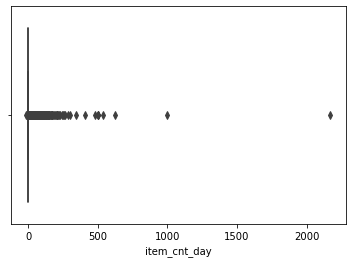

In [6]:
import seaborn as sns
sns.boxplot(x=dataFrame.item_cnt_day)

<AxesSubplot:xlabel='item_price'>

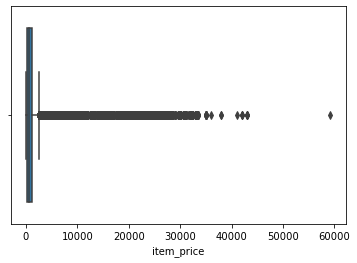

In [7]:
import seaborn as sns
sns.boxplot(x=dataFrame.item_price)

In [8]:
dataFrame = dataFrame[(dataFrame.item_price < 300000 )& (dataFrame.item_cnt_day < 1000)]
# remove negative item price
dataFrame = dataFrame[dataFrame.item_price > 0].reset_index(drop = True)

In [9]:
dataFrame = dataFrame.groupby(["date_block_num","shop_id","item_id"])[['date_block_num','date', 'shop_id', 'item_id', 'item_price', 'item_cnt_day']].agg({"date_block_num":'mean',"date":["min",'max'],"item_price":"mean","item_cnt_day":"sum"})

In [10]:
dataFrame = dataFrame.item_cnt_day.apply(list).reset_index()

In [11]:
#test_data랑 합쳐줌

dataFrame = pd.merge(test_data,dataFrame,on = ['item_id','shop_id'],how = 'left')

In [12]:
#Nan 값은 0으로 채워주고, shop_id랑 item_id는 버려줌(id랑 date_block_num만 남겨둠.)

dataFrame.fillna(0,inplace = True)
dataFrame.drop(['shop_id','item_id'],inplace = True, axis = 1)

In [13]:
#time series data format 준비

dataFrame = dataFrame.pivot_table(index = 'ID', columns='date_block_num', values = 'sum', aggfunc='sum')

In [14]:
#NaN 값은 0으로 채우기

dataFrame = dataFrame.fillna(0)
dataFrame

date_block_num,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0
ID,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
214196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
214197,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
X=dataFrame[dataFrame.columns[:-1]] #0부터 32까지 date_block_num 에 해당하는 dataFrame
y=dataFrame[dataFrame.columns[-1]] # date_block_num 33(마지막)에 해당하는 dataFrame

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, y, test_size=0.20, random_state=1)

In [27]:
# LinearRegression

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, Y_train)
lr_predict=lr.predict(X_test)

print(lr_predict)

[ 0.06255704 -0.03944123  0.33869896 ...  0.06255704  0.66804751
  1.16602237]


In [48]:
from sklearn.metrics import mean_squared_error

train_pred = lr.predict(X_train)
test_pred = lr.predict(X_test)

print('Train set mse:', mean_squared_error(Y_train, train_pred))
print('Test set mse:', mean_squared_error(Y_test, test_pred))
print('Test set score:', lr.score(X_train,Y_train))

Train set mse: 2.653940928177527
Test set mse: 1.8247207104166663
Test set score: 0.674286039566897


In [45]:
# RandomForest
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor()

rf.fit(X_train,Y_train)
rf_predict=(rf.predict(X_test))

print(rf_predict)

[0.13535913 0.18       0.37407898 ... 0.13535913 0.532      0.63984596]


In [47]:
train_pred = rf.predict(X_train)
test_pred = rf.predict(X_test)

print('Train set mse:', mean_squared_error(Y_train, train_pred))
print('Test set mse:', mean_squared_error(Y_test, test_pred))
print('Test set score:', rf.score(X_train,Y_train))

Train set mse: 1.7194582175492634
Test set mse: 1.5943388794709261
Test set score: 0.7889736203654675


In [20]:
import xgboost as xgb

xg = xgb.XGBRegressor(base_score=0.5,
                      n_estimators=400,
                      min_child_weight=1,
                     max_depth=7,
                     learning_rate=0.1,
                     booster='gbtree',
                     tree_method='exact',
                     reg_alpha=0,
                     subsample=0.5,
                     validate_parameters=1,
                     colsample_bylevel=1,
                     colsample_bynode=1,
                     colsample_bytree=1,
                     gamma=0)

xg.fit(X_train,Y_train)
xg_predict=(xg.predict(X_test))

In [21]:
print(xg_predict)

[0.12217304 0.14155999 0.29170778 ... 0.12217304 0.7153677  0.43796507]


In [19]:
from sklearn.metrics import mean_squared_error

train_pred = xg.predict(X_train)
test_pred = xg.predict(X_test)

print('Train set mse:', mean_squared_error(Y_train, train_pred))
print('Test set mse:', mean_squared_error(Y_test, test_pred))
print('Test set score:', xg.score(X_train,Y_train))

Train set mse: 1.4725317452846838
Test set mse: 1.6524971242454929
Test set score: 0.8192785146316337


In [ ]:
from sklearn.svm import SVR

svr = SVR()

svr.fit(X_train,Y_train)
svr_predict=(svr.predict(X_test))

print(svr_predict)

In [ ]:
train_pred = svr.predict(X_train)
test_pred = svr.predict(X_test)

print('Train set mse:', mean_squared_error(Y_train, train_pred))
print('Test set mse:', mean_squared_error(Y_test, test_pred))
print('Test set score:', svr.score(X_train,Y_train))

In [22]:
import keras
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout
from keras.models import load_model, Model

# defining model 
model = Sequential()
model.add(LSTM(units = 128,return_sequences=True,input_shape = (33,1)))
model.add(Dropout(0.5))
model.add(LSTM(units = 64,return_sequences=False,activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16))
model.add(Dense(1))

# opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss = 'mse',optimizer = 'Nadam', metrics = ['mean_squared_error'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 33, 128)           66560     
                                                                 
 dropout (Dropout)           (None, 33, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [23]:
from sklearn.model_selection import train_test_split
X_train = np.expand_dims(dataFrame.values[:,:-1],axis = 2)
y_train = dataFrame.values[:,-1:]
model.fit(X_train,y_train, batch_size = 1024,epochs = 10, validation_split=0.1)

Epoch 1/10
189/189 [==============================] - 201s 1s/step - loss: 6.8691 - mean_squared_error: 6.8691 - val_loss: 1.0506 - val_mean_squared_error: 1.0506
Epoch 2/10
189/189 [==============================] - 201s 1s/step - loss: 5.5179 - mean_squared_error: 5.5179 - val_loss: 1.6237 - val_mean_squared_error: 1.6237
Epoch 3/10
189/189 [==============================] - 234s 1s/step - loss: 8.0724 - mean_squared_error: 8.0724 - val_loss: 1.1282 - val_mean_squared_error: 1.1282
Epoch 4/10
189/189 [==============================] - 209s 1s/step - loss: 5.6570 - mean_squared_error: 5.6570 - val_loss: 0.8452 - val_mean_squared_error: 0.8452
Epoch 5/10
189/189 [==============================] - 196s 1s/step - loss: 4.4921 - mean_squared_error: 4.4921 - val_loss: 0.8737 - val_mean_squared_error: 0.8737
Epoch 6/10
189/189 [==============================] - 196s 1s/step - loss: 4.0451 - mean_squared_error: 4.0451 - val_loss: 0.9310 - val_mean_squared_error: 0.9310
Epoch 7/10
189/189 [==

Text(0, 0.5, 'MSE')

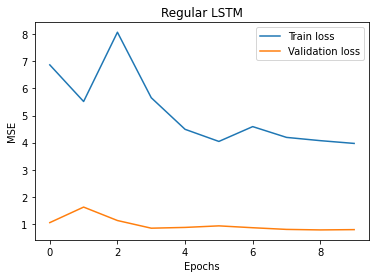

In [24]:
import matplotlib.pyplot as plt
plt.plot(model.history.history['loss'], label='Train loss')
plt.plot(model.history.history['val_loss'], label='Validation loss')
plt.legend(loc='best')
# plt.title
plt.title('Regular LSTM')
plt.xlabel('Epochs')
plt.ylabel('MSE')

In [25]:
train_pred = model.predict(X_train)
print('Train mse:', mean_squared_error(y_train, train_pred))

X_test = dataFrame.loc[:,dataFrame.columns!=dataFrame.columns[0]]
y_test = dataFrame[dataFrame.columns[0]]
test_pred = model.predict(np.expand_dims(X_test,axis = 2))
print('test rmse:', np.sqrt(mean_squared_error(y_test, test_pred)))

6694/6694 [==============================] - 167s 25ms/step
Train mse: 3.212242248710202
6694/6694 [==============================] - 223s 33ms/step
test rmse: 1.9659018925603207


In [38]:
print('Train mse:', mean_squared_error(y_train, train_pred))

Train rmse: 2.5388337932760705


In [40]:
X_test = dataFrame.loc[:,dataFrame.columns!=dataFrame.columns[0]]
y_test = dataFrame[dataFrame.columns[0]]

In [43]:
test_pred = model.predict(np.expand_dims(X_test,axis = 2))

6694/6694 [==============================] - 357s 52ms/step


In [44]:
print('test rmse:', np.sqrt(mean_squared_error(y_test, test_pred)))

test rmse: 1.0693680279837634
